In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

###################################################################################
###################################################################################
###################################################################################

##### Ps ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/PsSPEP2020_12_23_18_09_19"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/PsSPEP2020_12_23_22_21_02"

##### Ns ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/NsSPEP2020_12_26_17_06_02"

##### Atlases ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/AtlasesSPEP2020_12_29_02_35_14"

###################################################################################
###################################################################################
###################################################################################

##### Ns ##### 
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/SPEPleaveOneOut_Ns2_2021_01_27_02_19_12"

##### Ps ##### 
resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/SPEPleaveOneOut_Ps2021_01_28_18_17_55"

###################################################################################
###################################################################################
###################################################################################

# Find all output folder
outputDirs = []
for fname in os.listdir(resultsDir):
    path = os.path.join(resultsDir, fname)
    if os.path.isdir(path):
        outputDirs.append(path)
        
# sort the list in order to match the testData.txt order
outputDirs.sort()
        
# Read all dice.txt files
diceData = []
for outputDir in outputDirs:
    diceFile = os.path.join(outputDir, "dice.txt")
    with open(diceFile, "r") as f:
        diceData.append(f.read())
        
# Find all the tests and initialize the dicts
dictSPEP = {}
data = diceData[0].split("\n")
for line in data:
    col = line.find(":")
    if (line[:col]).isdigit():
        key = line[col+2:]
        dictSPEP[key] = []
        
# Populate the dicts
for data in diceData:
    lines = data.split("\n")
    for line in lines:
        col = line.find(":")
        if (line[:col]).isdigit():
            key = line[col+2:]
        elif line.startswith("SPEP: "):
            dictSPEP[key].append([float(num) for num in (line[6:]).strip('][').split(', ')])
            
def getValues(key):
    values = key.split(',')
    string = "Atlases: "
    atlas  = int(values[0][len(string):])
    string = " P: "
    P = [int(num) for num in (values[1][len(string):]).strip('][').split(' ')]
    string = " N: "
    N = [int(num) for num in (values[2][len(string):]).strip('][').split(' ')]
    return (atlas, P, N)

# Find all tests
atlases = []
Ps = []
Ns = []
for key, _ in dictSPEP.items():
    atlas, P, N = getValues(key)
    atlases.append(atlas)
    Ps.append(P)
    Ns.append(N)

def unique(a):
    indexes = np.unique(a, axis=0, return_index=True)[1]
    return [a[index] for index in sorted(indexes)]

atlases = unique(atlases)
Ps = unique(Ps)
Ns = unique(Ns)

if len(atlases) > 1:
    xlabels = atlases
    xlabel = "Number of atlases"
elif len(Ps) > 1:
    xlabels = Ps
    xlabel = "P"
elif len(Ns) > 1:
    xlabels = Ns
    xlabel = "N"

# Group per label
numOfLabels = 3

dataSPEP = []
for l in range(numOfLabels):
    dataSPEP.append([])
    for _ in range(len(dictSPEP)):
        dataSPEP[l].append([])
    
for index, (key, values) in enumerate(dictSPEP.items()):
    for v in values:
        for l in range(numOfLabels):
            dataSPEP[l][index].append(v[l])


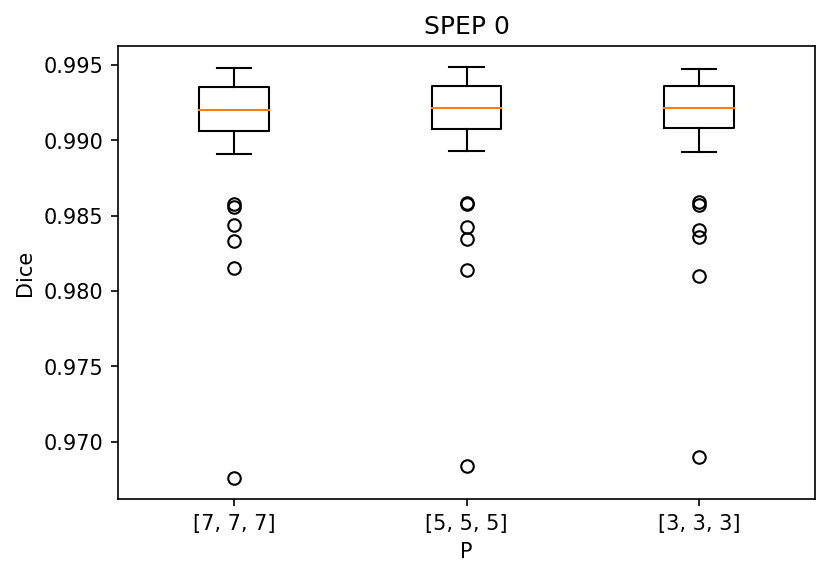

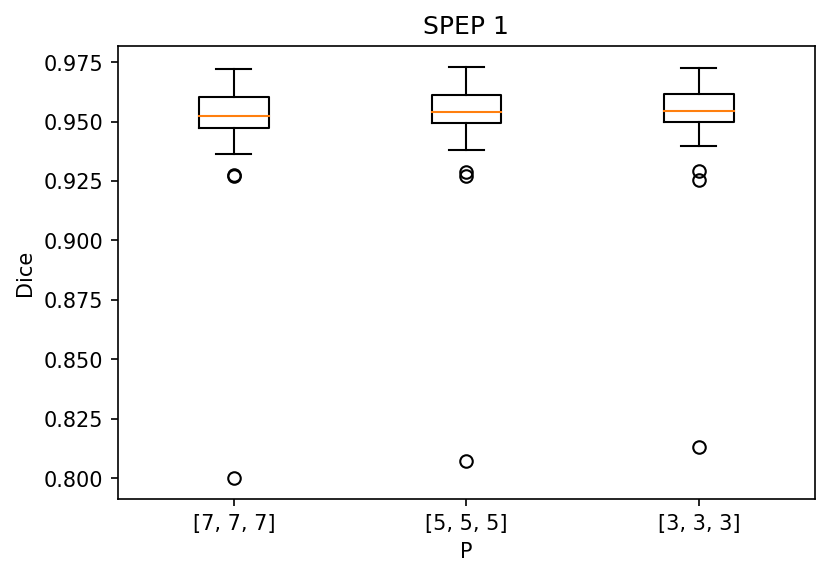

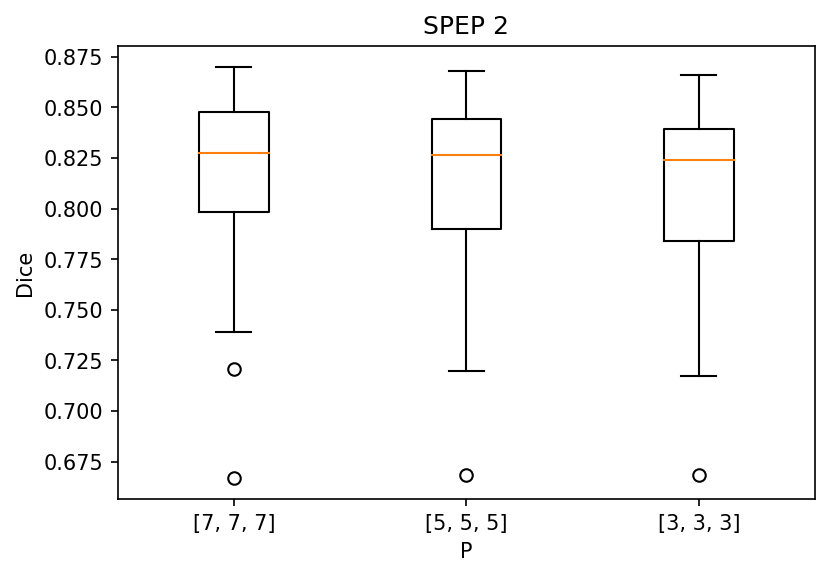

In [5]:

for l in range(numOfLabels):
    plt.figure(dpi=150)
    plt.boxplot(dataSPEP[l], labels=xlabels)
    plt.title(f"SPEP {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()
    


In [6]:
for l in range(len(dataSPEP)):
    for t in range(len(dataSPEP[l])):
        print(l, xlabels[t], ":", np.mean(dataSPEP[l][t]))

0 [7, 7, 7] : 0.9909432084236939
0 [5, 5, 5] : 0.9910555928423589
0 [3, 3, 3] : 0.99105128425952
1 [7, 7, 7] : 0.9503531351199376
1 [5, 5, 5] : 0.9516883734887717
1 [3, 3, 3] : 0.9522228924160118
2 [7, 7, 7] : 0.8182006011728602
2 [5, 5, 5] : 0.8146413784777338
2 [3, 3, 3] : 0.8108040358900644


In [14]:
xlabels

[[11, 11, 11], [9, 9, 9], [7, 7, 7], [5, 5, 5], [3, 3, 3]]